# Multiple Regression

In [5]:
import pandas as pd
import numpy as np 
from sklearn import linear_model

In [13]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('data.csv', header=None)  # Read without headers
df = df[0].str.split(';', expand=True)  # Split each row by ';' into separate columns

# Set the first column as the header
df.columns = df.iloc[0]  # Use the first row as headers
df = df.iloc[1:]  # Remove the first row from the data

# Reset the index for better readability
df.reset_index(drop=True, inplace=True)

# Transpose the DataFrame
df = df.transpose()

# Make the first row the header
df.columns = df.iloc[0]  # Set the first row as the header
df = df.iloc[1:]  # Remove the first row from the data

# Reset the index for better readability
df.reset_index(drop=True, inplace=True)

# Display the processed DataFrame
print(df)

year profitability solvency liquidity  acid  quick       profit
0              7.8   1213.2     104.0  79.9   38.9  750890465.0
1              7.1    121.7     110.3  75.7   36.3  609233756.0
2              6.0    162.8     115.9  78.9   55.8  404128445.0
3              5.5    164.0     108.0  59.0   49.0  254882923.0
4              1.2    170.0     116.0  85.0   68.0  170672704.0
5              0.2    191.0     111.0  84.0   50.0    4312626.0
6              0.2    136.0      75.0  77.0  124.0    2667751.0
7              3.8    104.0      30.0  28.0  112.0   14069819.0
8              3.5     63.4      34.9  28.1  148.1   10979216.0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file and process it
df = pd.read_csv('data.csv', header=None)  # Read without headers
df = df[0].str.split(';', expand=True)  # Split each row by ';' into separate columns

# Set the first column as the header
df.columns = df.iloc[0]  # Use the first row as headers
df = df.iloc[1:]  # Remove the first row from the data

# Reset the index for better readability
df.reset_index(drop=True, inplace=True)

# Transpose the DataFrame
df = df.transpose()

# Make the first row the header
df.columns = df.iloc[0]  # Set the first row as the header
df = df.iloc[1:]  # Remove the first row from the data

# Reset the index for better readability
df.reset_index(drop=True, inplace=True)

# Convert all columns to numeric (if necessary)
df = df.apply(pd.to_numeric, errors='coerce')

# Independent variables (factors)
X = df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']]

# Dependent variable (result)
y = df['profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 5.367283002194006e+16
R-squared: 0.3939042056845905
         Feature   Coefficient
0  profitability  6.009631e+07
1       solvency  3.822862e+05
2      liquidity  7.051975e+06
3           acid  1.618463e+05
4          quick  4.053326e+06


In [15]:
import pandas as pd

# Assuming `df` is already processed and numeric
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation of independent variables with 'profit'
print("\nCorrelation with 'profit':")
print(correlation_matrix['profit'])

Correlation Matrix:
year           profitability  solvency  liquidity      acid     quick  \
year                                                                    
profitability       1.000000  0.475104   0.172560 -0.072602 -0.469573   
solvency            0.475104  1.000000   0.246241  0.309311 -0.408286   
liquidity           0.172560  0.246241   1.000000  0.896058 -0.870226   
acid               -0.072602  0.309311   0.896058  1.000000 -0.683569   
quick              -0.469573 -0.408286  -0.870226 -0.683569  1.000000   
profit              0.849626  0.673718   0.536994  0.419260 -0.711553   

year             profit  
year                     
profitability  0.849626  
solvency       0.673718  
liquidity      0.536994  
acid           0.419260  
quick         -0.711553  
profit         1.000000  

Correlation with 'profit':
year
profitability    0.849626
solvency         0.673718
liquidity        0.536994
acid             0.419260
quick           -0.711553
profit           1.00000

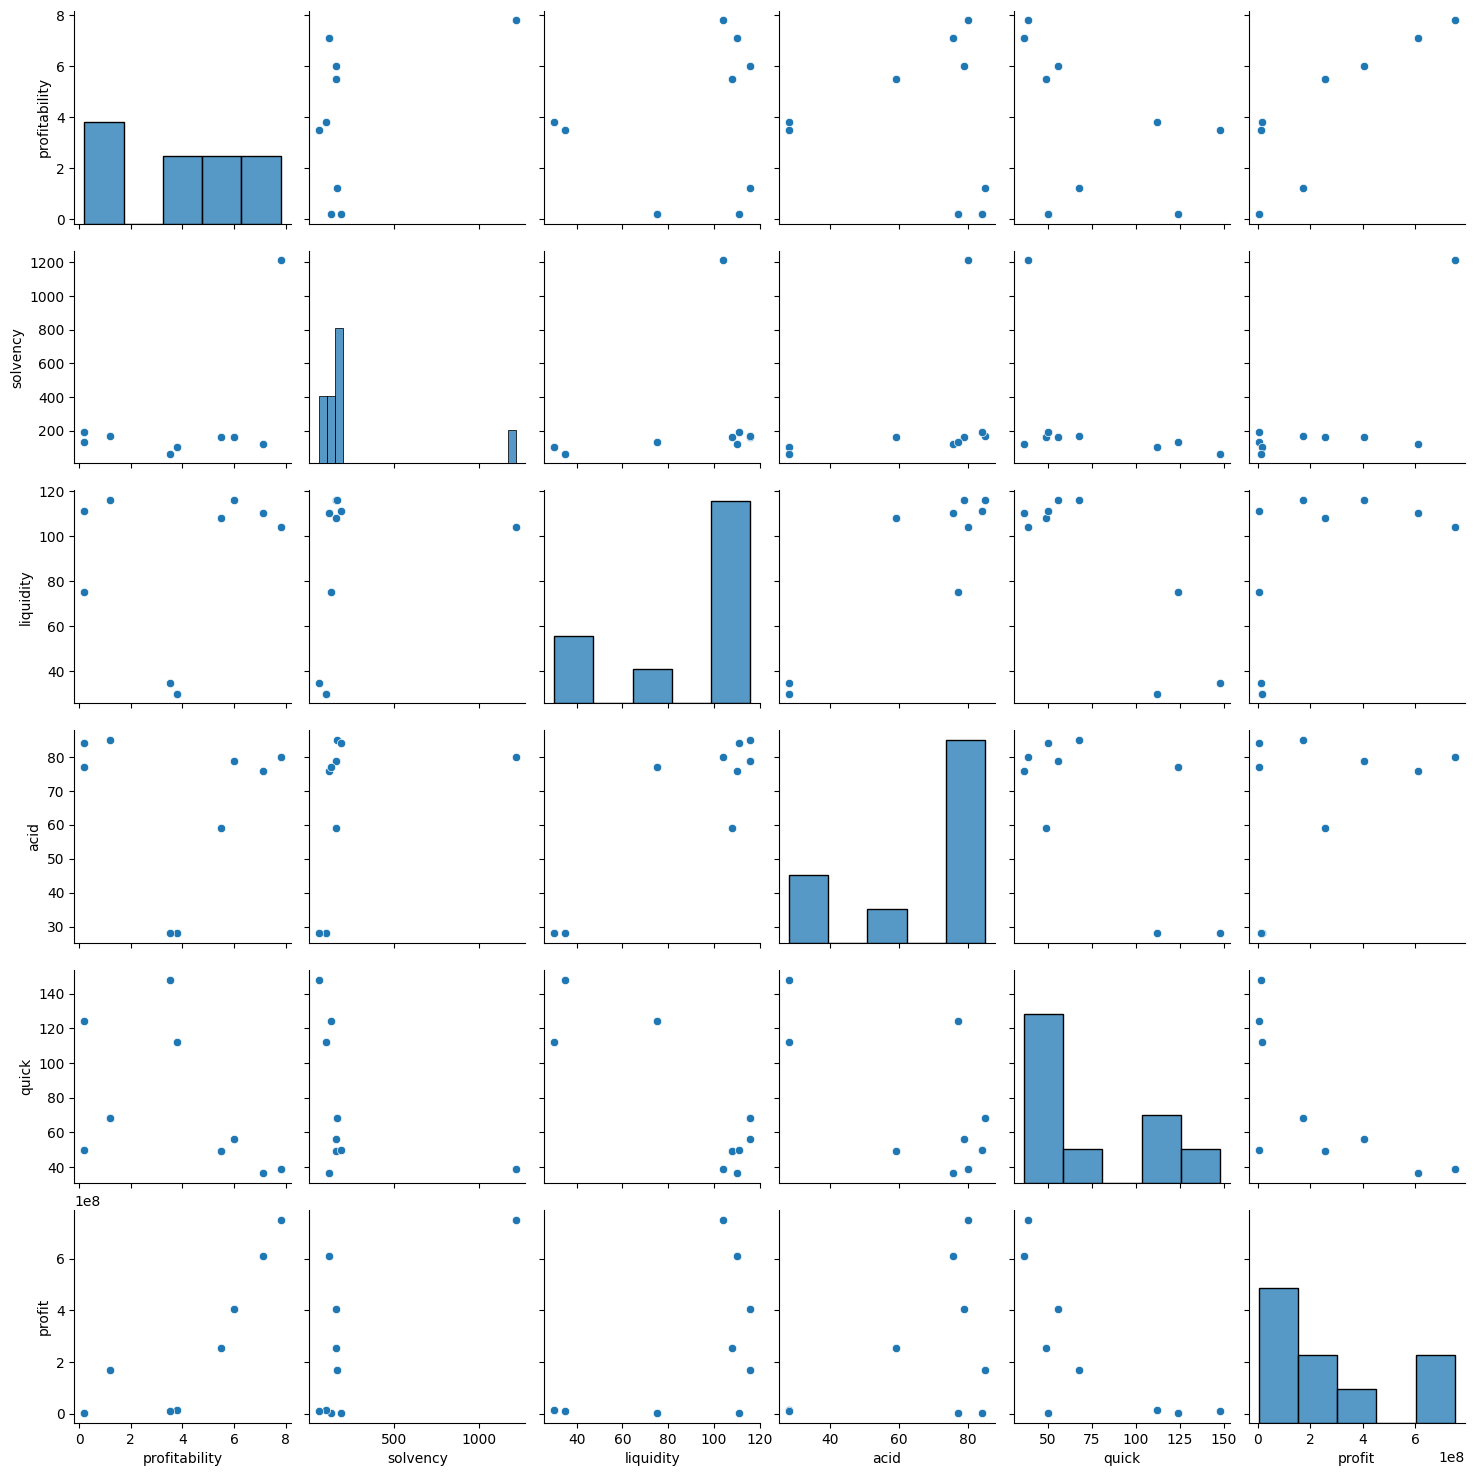

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

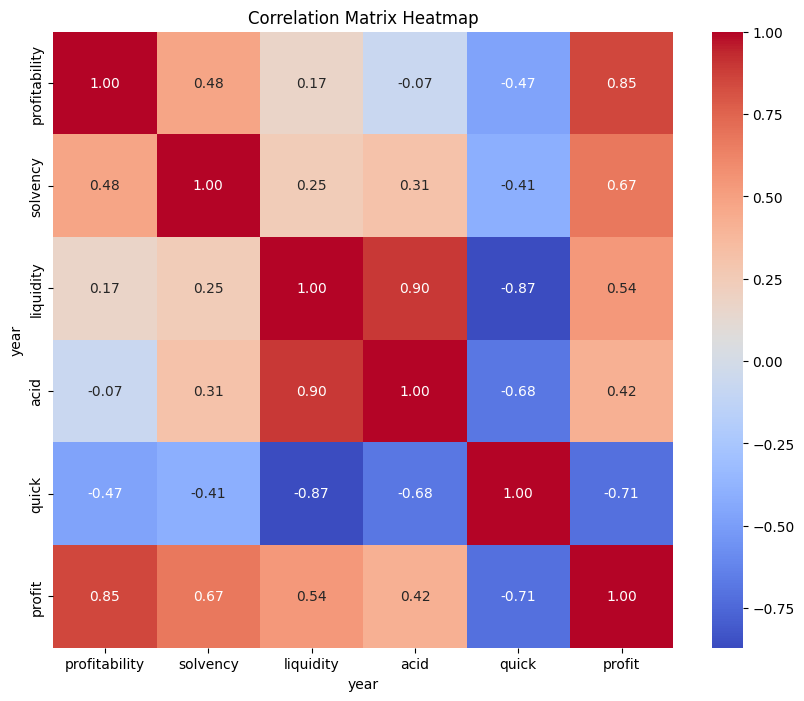

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

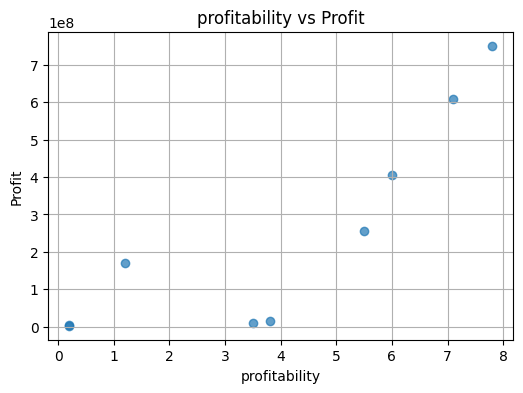

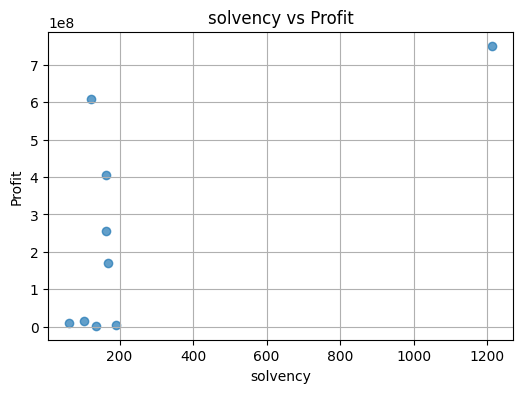

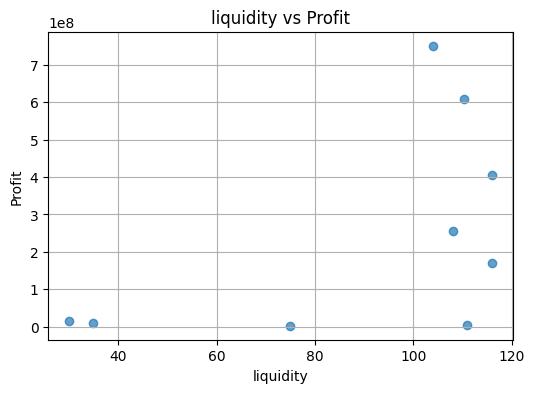

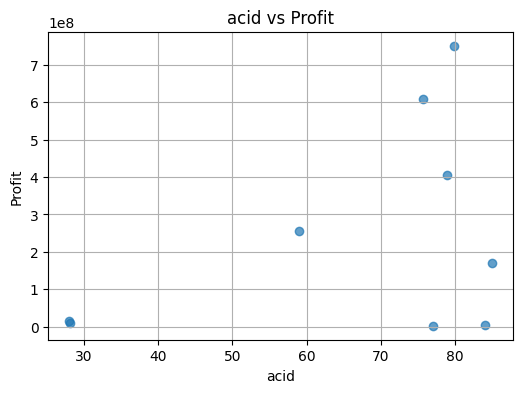

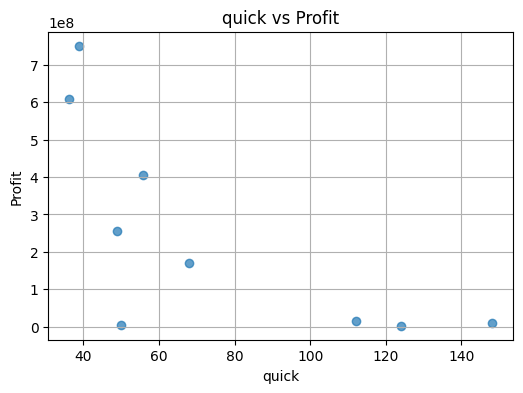

In [19]:
import matplotlib.pyplot as plt

# Scatterplot for each independent variable vs profit
independent_vars = ['profitability', 'solvency', 'liquidity', 'acid', 'quick']

for var in independent_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], df['profit'], alpha=0.7)
    plt.title(f"{var} vs Profit")
    plt.xlabel(var)
    plt.ylabel("Profit")
    plt.grid(True)
    plt.show()

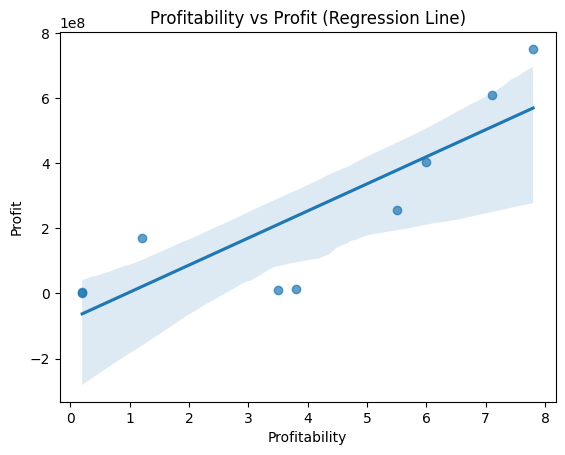

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for profitability vs profit
sns.regplot(x='profitability', y='profit', data=df, scatter_kws={'alpha':0.7})
plt.title("Profitability vs Profit (Regression Line)")
plt.xlabel("Profitability")
plt.ylabel("Profit")
plt.show()

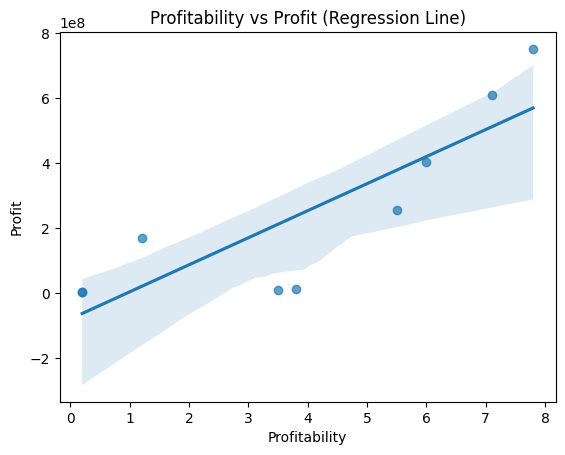

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for profitability vs profit
sns.regplot(x='profitability', y='profit', data=df, scatter_kws={'alpha':0.7})
plt.title("Profitability vs Profit (Regression Line)")
plt.xlabel("Profitability")
plt.ylabel("Profit")
plt.show()

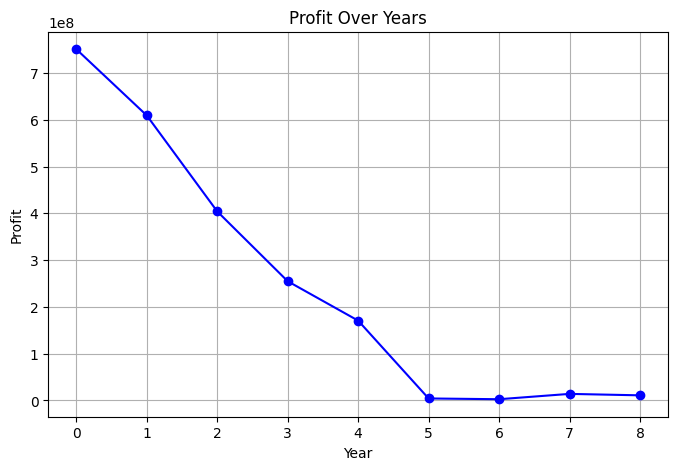

In [29]:
import matplotlib.pyplot as plt

# Line plot for profit over years
plt.figure(figsize=(8, 5))
plt.plot(df['year'], df['profit'], marker='o', linestyle='-', color='b')
plt.title("Profit Over Years")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

In [28]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Multiple linear regression

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `df` is already processed and numeric
# Independent variables (factors)
X = df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']]

# Dependent variable (result)
y = df['profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 5.367283002194006e+16
R-squared: 0.3939042056845905
         Feature   Coefficient
0  profitability  6.009631e+07
1       solvency  3.822862e+05
2      liquidity  7.051975e+06
3           acid  1.618463e+05
4          quick  4.053326e+06


Correlation Matrix:
year               year  profitability  solvency  liquidity      acid  \
year                                                                    
year           1.000000      -0.692649 -0.593002  -0.786322 -0.656456   
profitability -0.692649       1.000000  0.475104   0.172560 -0.072602   
solvency      -0.593002       0.475104  1.000000   0.246241  0.309311   
liquidity     -0.786322       0.172560  0.246241   1.000000  0.896058   
acid          -0.656456      -0.072602  0.309311   0.896058  1.000000   
quick          0.886157      -0.469573 -0.408286  -0.870226 -0.683569   
profit        -0.932655       0.849626  0.673718   0.536994  0.419260   

year              quick    profit  
year                               
year           0.886157 -0.932655  
profitability -0.469573  0.849626  
solvency      -0.408286  0.673718  
liquidity     -0.870226  0.536994  
acid          -0.683569  0.419260  
quick          1.000000 -0.711553  
profit        -0.711553  1.000000 

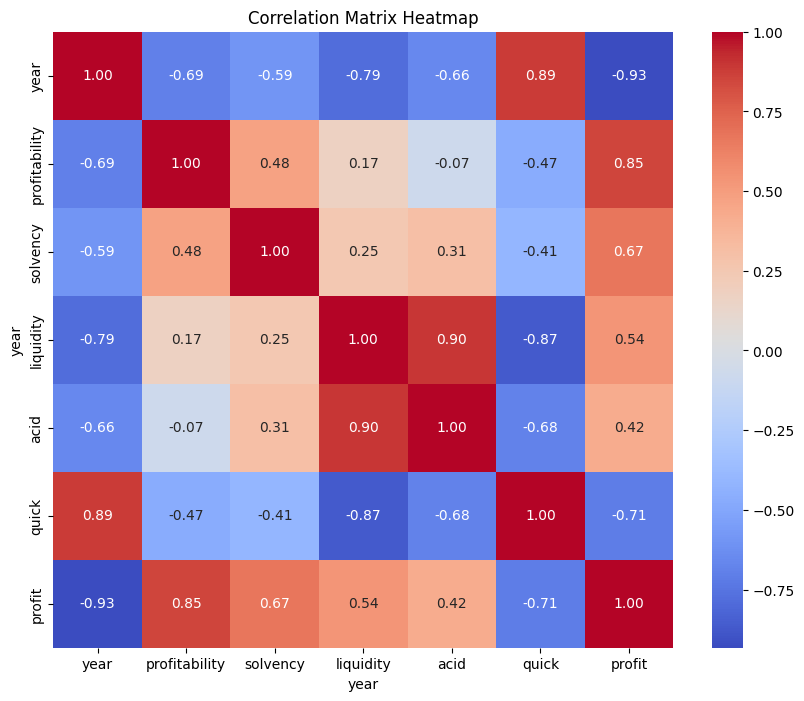


Mean Squared Error: 5.367283002194006e+16
R-squared: 0.3939042056845905

Coefficients:
         Feature   Coefficient
0  profitability  6.009631e+07
1       solvency  3.822862e+05
2      liquidity  7.051975e+06
3           acid  1.618463e+05
4          quick  4.053326e+06


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is already processed and numeric
# Independent variables (factors)
X = df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']]

# Dependent variable (result)
y = df['profit']

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)

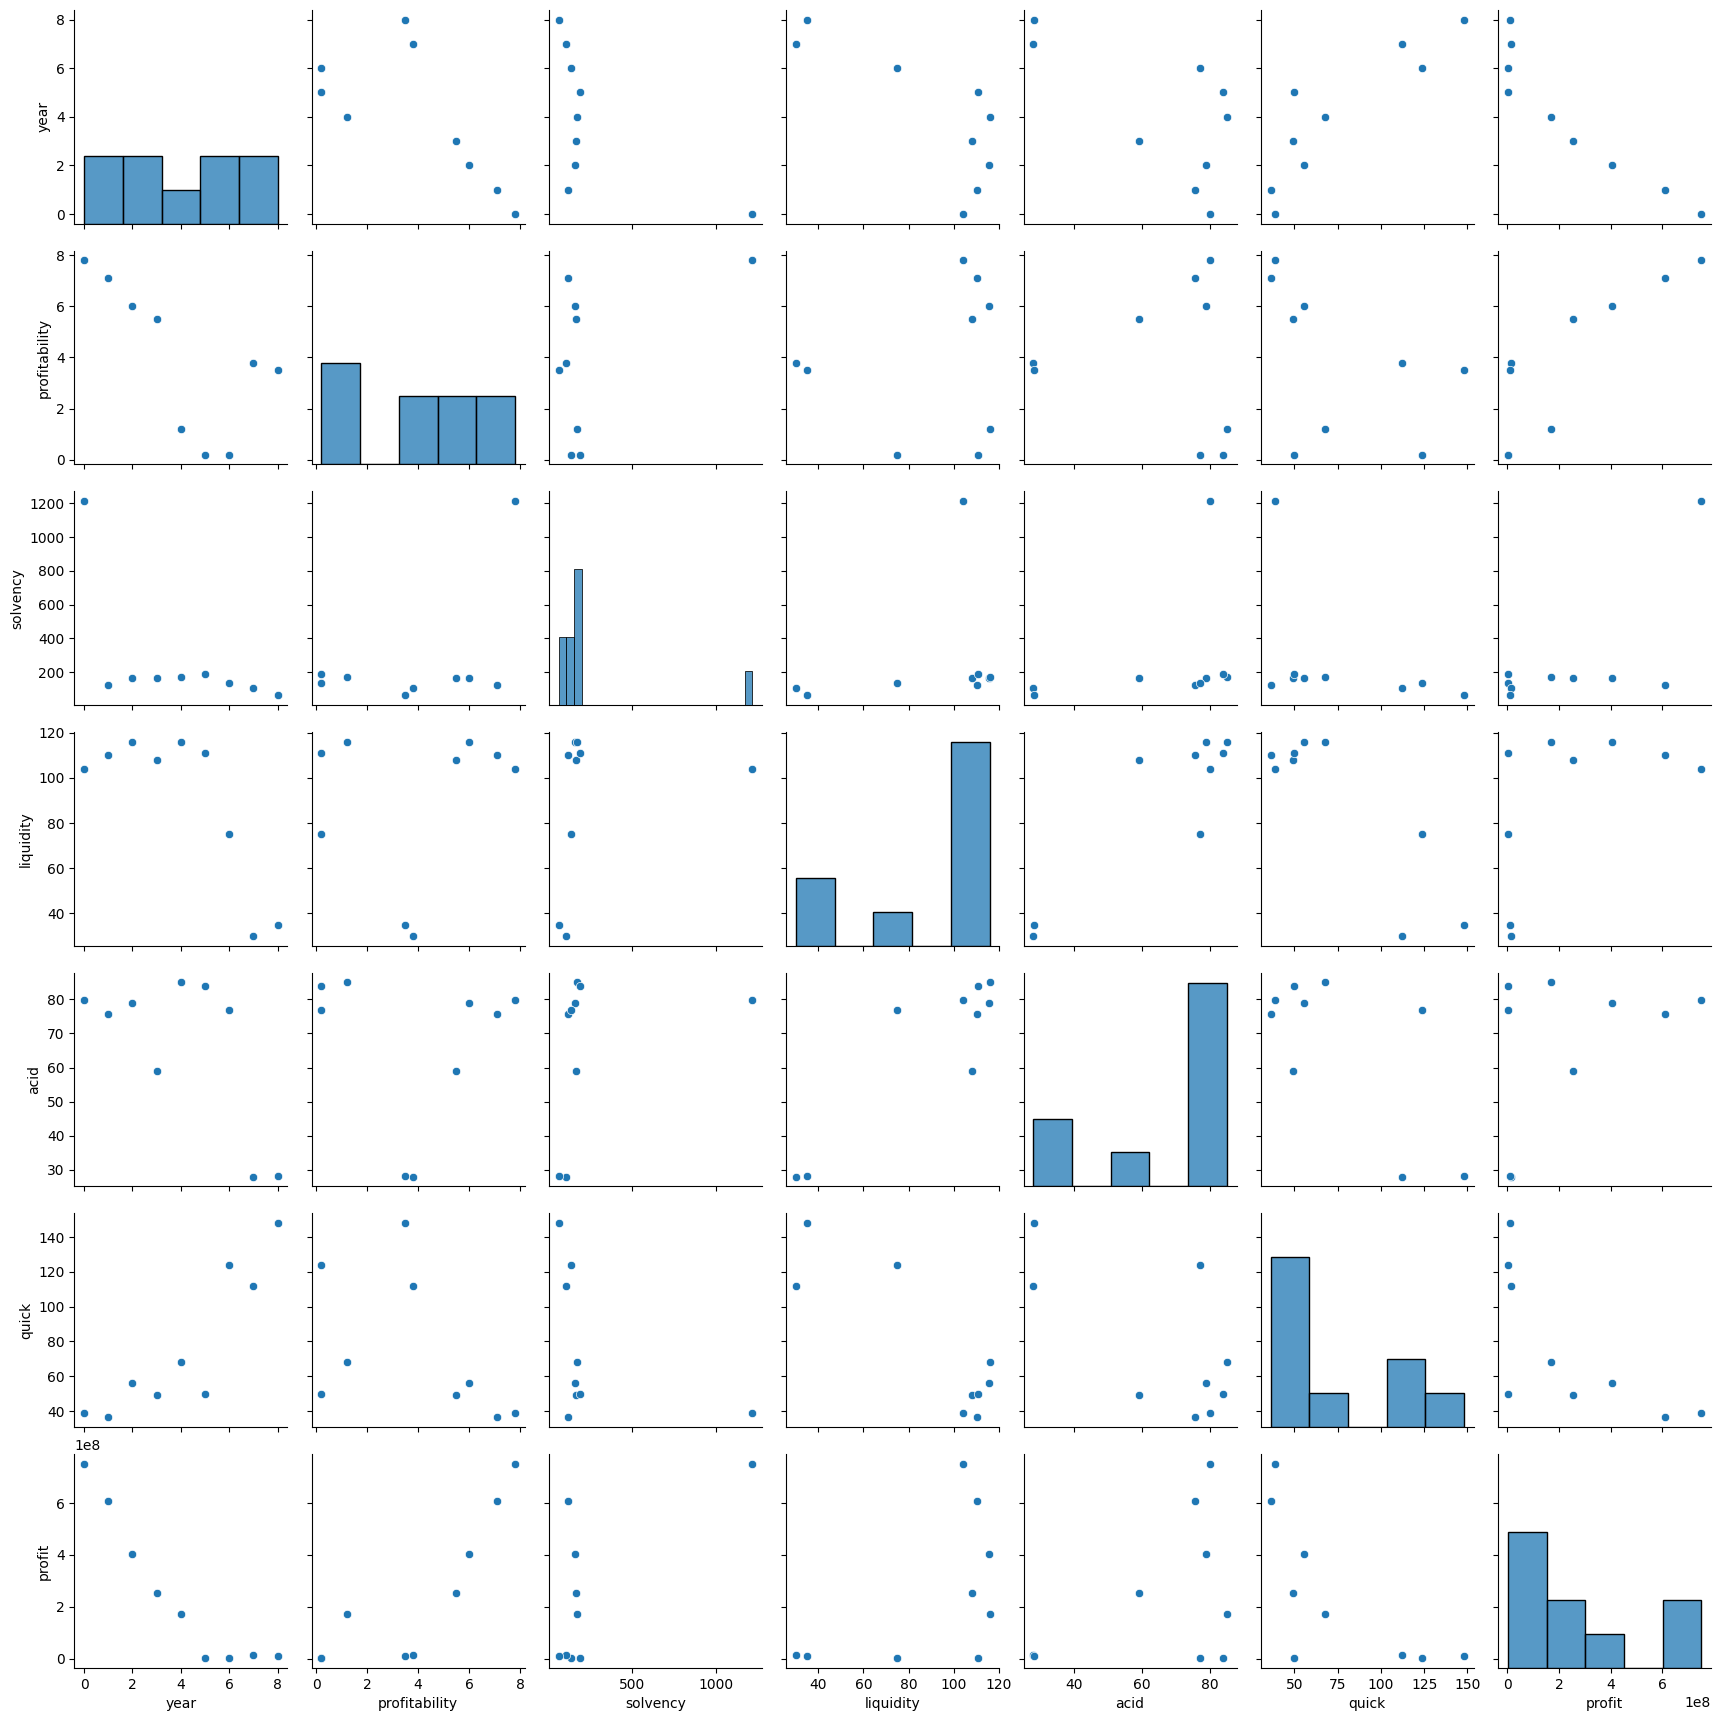

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

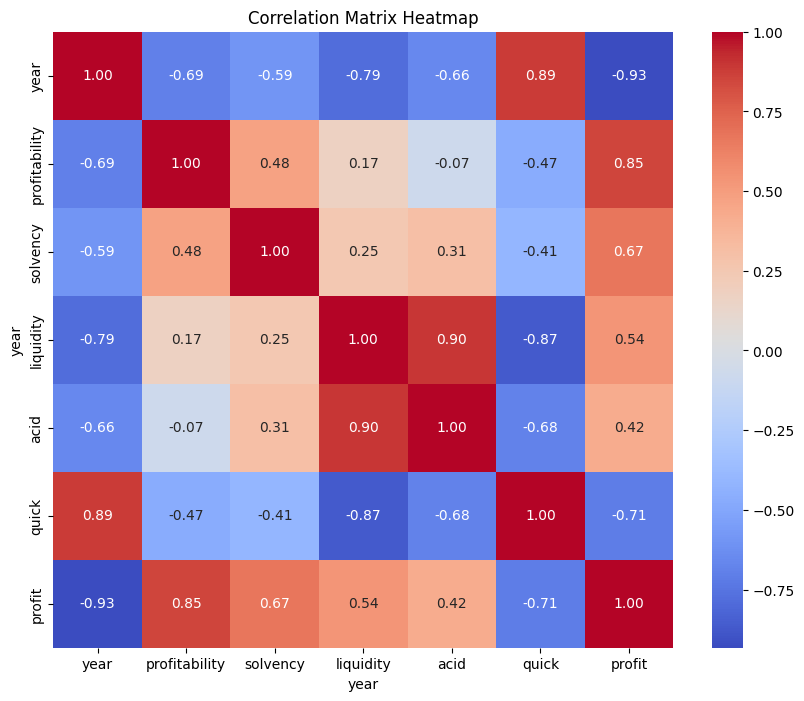

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

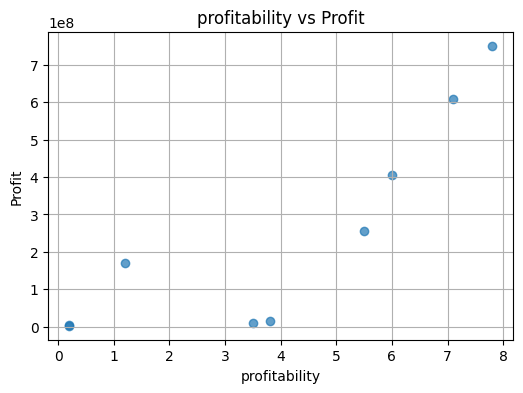

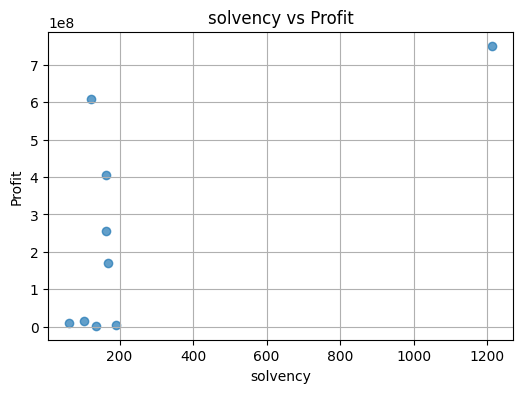

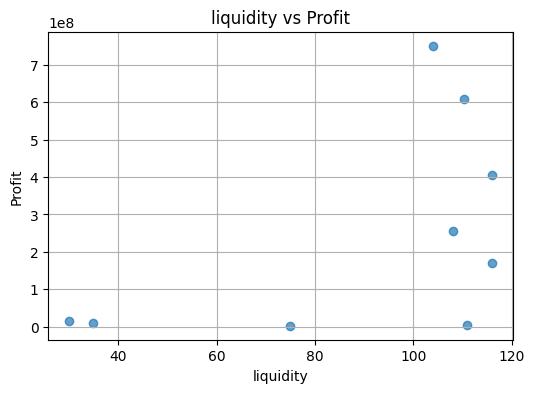

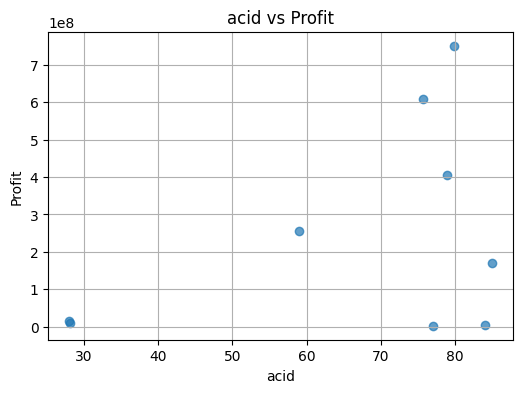

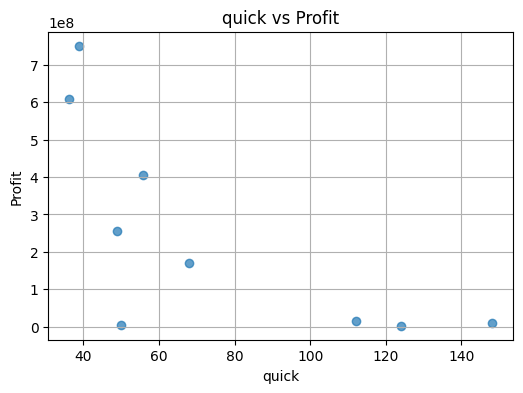

In [34]:
import matplotlib.pyplot as plt

# Scatterplot for each independent variable vs profit
independent_vars = ['profitability', 'solvency', 'liquidity', 'acid', 'quick']

for var in independent_vars:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var], df['profit'], alpha=0.7)
    plt.title(f"{var} vs Profit")
    plt.xlabel(var)
    plt.ylabel("Profit")
    plt.grid(True)
    plt.show()

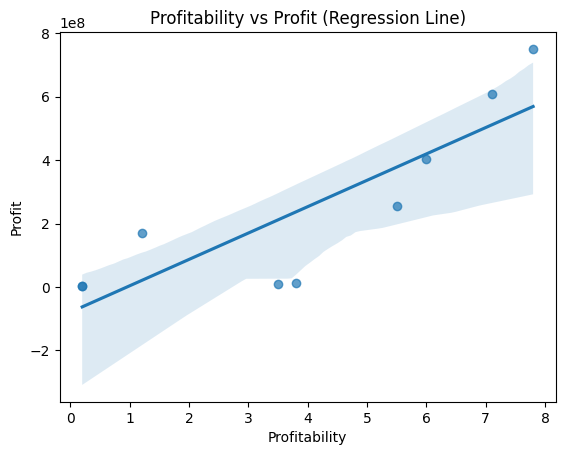

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for profitability vs profit
sns.regplot(x='profitability', y='profit', data=df, scatter_kws={'alpha':0.7})
plt.title("Profitability vs Profit (Regression Line)")
plt.xlabel("Profitability")
plt.ylabel("Profit")
plt.show()

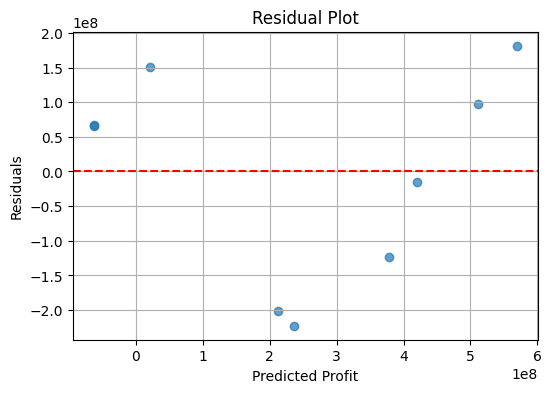

In [36]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression model for demonstration
X = df[['profitability']]  # Example independent variable
y = df['profit']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

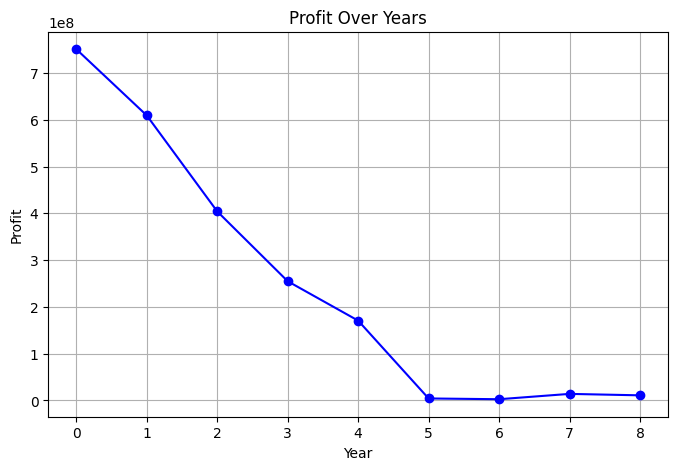

In [37]:
import matplotlib.pyplot as plt

# Line plot for profit over years
plt.figure(figsize=(8, 5))
plt.plot(df['year'], df['profit'], marker='o', linestyle='-', color='b')
plt.title("Profit Over Years")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

# Econometric Model

An econometric model is a statistical model used to estimate economic relationships and test hypotheses. In Python, you can use libraries like statsmodels to build econometric models. Below is an example of how to create an econometric model using Ordinary Least Squares (OLS) regression.

Steps to Build an Econometric Model
Define the Dependent and Independent Variables:

Dependent variable (y): The variable you want to predict (e.g., profit).
Independent variables (X): The factors that influence the dependent variable (e.g., profitability, solvency, liquidity, acid, quick).
Fit the Model:

Use statsmodels to fit an OLS regression model.
Evaluate the Model:

Analyze the regression summary, which includes coefficients, p-values, R-squared, and other statistics.

In [39]:
# Code for Econometric Model
import pandas as pd
import statsmodels.api as sm

# Assuming `df` is already processed and numeric
# Independent variables (factors)
X = df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']]

# Dependent variable (result)
y = df['profit']

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     25.43
Date:                Fri, 04 Apr 2025   Prob (F-statistic):             0.0116
Time:                        18:05:02   Log-Likelihood:                -170.45
No. Observations:                   9   AIC:                             352.9
Df Residuals:                       3   BIC:                             354.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -4.5e+08   3.06e+08     -1.471

c:\Users\ITPARK\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


Explanation of the Code:
sm.add_constant(X):

Adds a constant term (intercept) to the independent variables. This is required for OLS regression.
sm.OLS(y, X).fit():

Fits the OLS regression model using the dependent variable (y) and independent variables (X).
model.summary():

Displays a detailed summary of the regression results, including:
Coefficients: The impact of each independent variable on the dependent variable.
P-values: Tests the significance of each coefficient.
R-squared: Indicates how well the independent variables explain the variance in the dependent variable.
F-statistic: Tests the overall significance of the model.

.

Interpreting the Results:
R-squared:

Indicates how well the independent variables explain the variance in the dependent variable.
Example: R-squared = 0.85 means 85% of the variance in profit is explained by the independent variables.
P-values:

Tests the significance of each coefficient.
A p-value < 0.05 indicates that the variable is statistically significant.
Coefficients:

The coefficients represent the change in the dependent variable (profit) for a one-unit change in the independent variable, holding all other variables constant.
F-statistic:

Tests the overall significance of the model. A small p-value for the F-statistic indicates that the model is statistically significant.
Durbin-Watson:

Tests for autocorrelation in the residuals. Values close to 2 indicate no autocorrelation.

.

Next Steps:
Check for Multicollinearity:

Use Variance Inflation Factor (VIF) to detect multicollinearity among independent variables.
Model Diagnostics:

Analyze residuals to check for normality, homoscedasticity, and independence.
Refine the Model:

Remove insignificant variables (p-value > 0.05) and re-run the regression.

Check for Multicollinearity

Use Variance Inflation Factor (VIF) to detect multicollinearity among independent variables.

To check for multicollinearity among independent variables, you can calculate the Variance Inflation Factor (VIF). A high VIF value (typically > 5 or 10) indicates multicollinearity, meaning the variable is highly correlated with other independent variables.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming `X` contains the independent variables
# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

         Feature         VIF
0          const  170.236999
1  profitability    2.808165
2       solvency    2.231429
3      liquidity   19.835383
4           acid   11.545386
5          quick    8.229867


Explanation of the Code:
sm.add_constant(X):

Adds a constant term (intercept) to the independent variables. This is required for VIF calculation.
variance_inflation_factor(X.values, i):

Calculates the VIF for the i-th independent variable in X.
VIF DataFrame:

Creates a DataFrame to display the feature names and their corresponding VIF values.

Interpreting VIF Values:
VIF = 1:
No correlation between the variable and other independent variables.
1 < VIF < 5:
Moderate correlation, generally acceptable.
VIF > 5 or 10:
High correlation, indicates multicollinearity. Consider removing or combining variables.

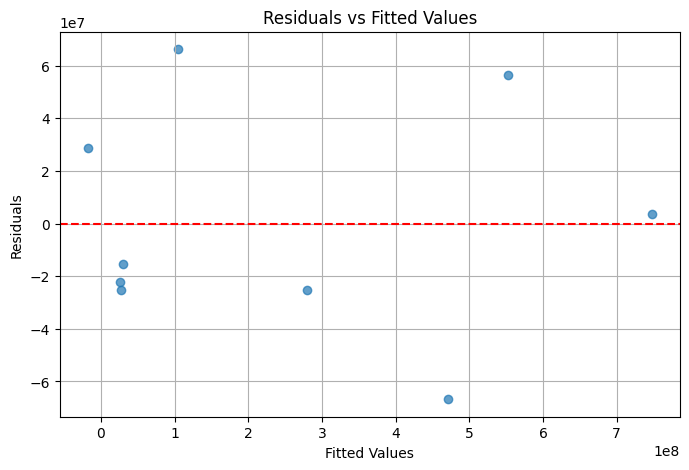

In [41]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = model.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

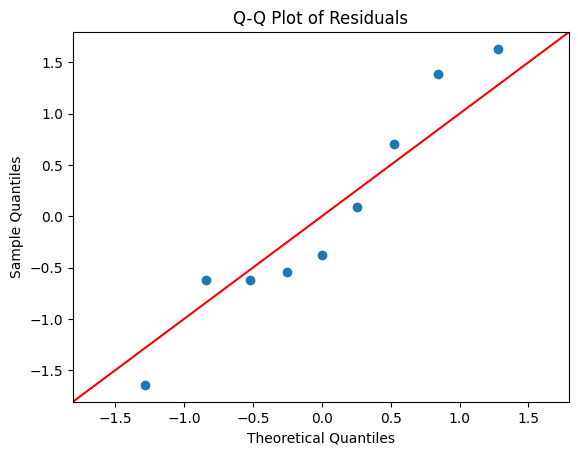

In [42]:
import statsmodels.api as sm

# Q-Q plot for residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

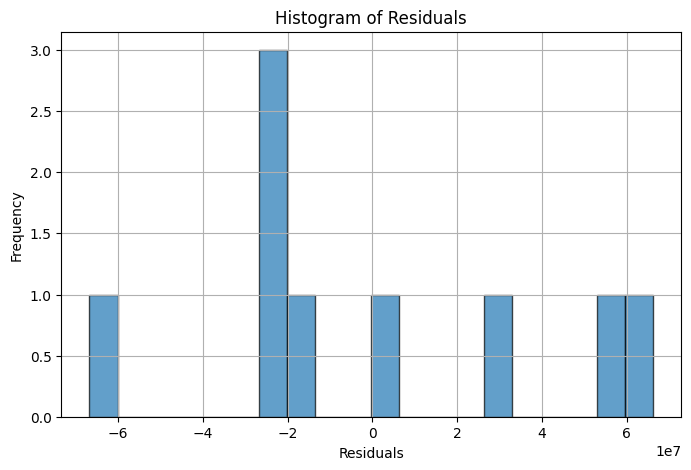

In [43]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

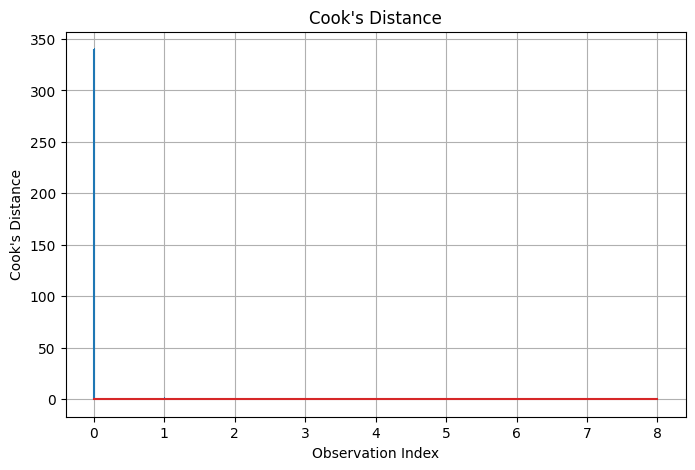

In [48]:
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt

# Calculate Cook's distance
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(8, 5))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()

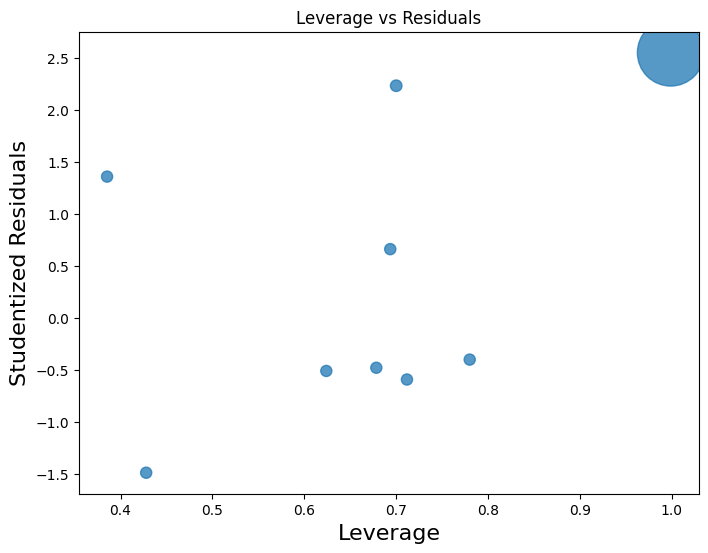

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

# Influence plot
fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model, ax=ax, criterion="cooks")
plt.title("Leverage vs Residuals")
plt.show()

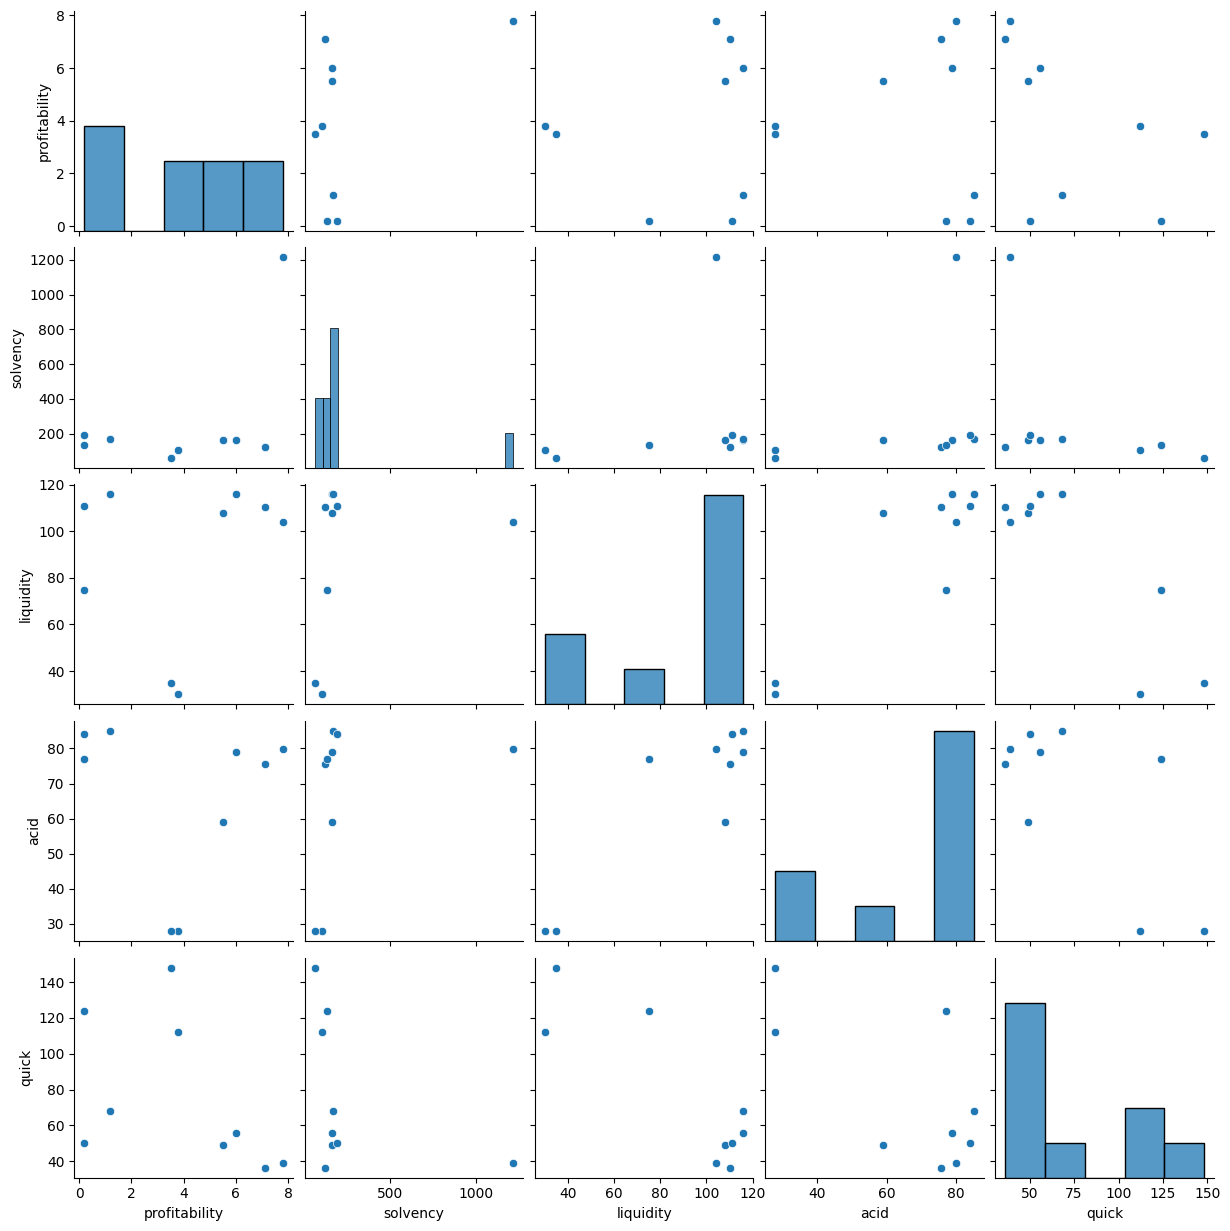

In [46]:
import seaborn as sns

# Pairplot for independent variables
sns.pairplot(df[['profitability', 'solvency', 'liquidity', 'acid', 'quick']])
plt.show()

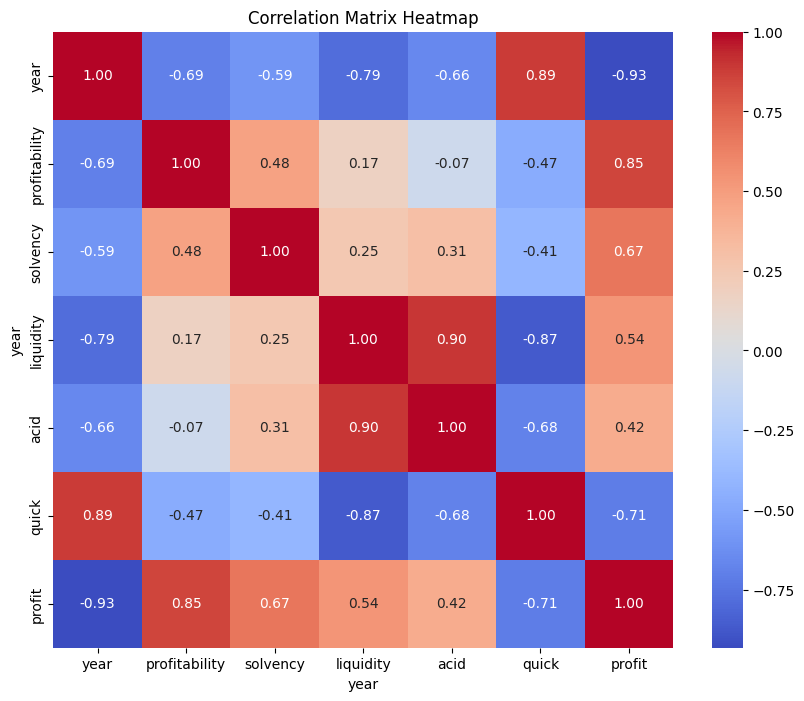

In [47]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()